# Load the dataset and see missing values:


In [ ]:
import pandas as pd

# Load the dataset
covid_data = pd.read_csv('Covid Data.csv')

# Handle missing values for numeric columns (replace 97 and 99 with NaN)
numeric_columns = covid_data.select_dtypes(include=['int64']).columns
covid_data_cleaned = covid_data.copy()
covid_data_cleaned[numeric_columns] = covid_data_cleaned[numeric_columns].replace([97, 99], pd.NA)

# Check for missing values
missing_values_summary = covid_data_cleaned.isnull().sum()
print(missing_values_summary)

# Check the summary statistics
summary_statistics = covid_data_cleaned.describe()
print(summary_statistics)


USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        221
PREGNANT                523511
DIABETES                     0
COPD                         0
ASTHMA                       0
INMSUPR                      0
HIPERTENSION                 0
OTHER_DISEASE                0
CARDIOVASCULAR               0
OBESITY                      0
RENAL_CHRONIC                0
TOBACCO                      0
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64
              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE      DIABETES  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00  2.186404e+00   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01  5.424242e+00   
min    1.000000e+00 

# Fix the missing values:

In [ ]:
covid_data_cleaned['INTUBED'] = covid_data_cleaned['INTUBED'].fillna(0)


covid_data_cleaned['ICU'] = covid_data_cleaned['ICU'].fillna(0)

# For 'PREGNANT' column: Set to 0 (not applicable) for males
covid_data_cleaned.loc[covid_data_cleaned['SEX'] == 2, 'PREGNANT'] = 0

covid_data_cleaned['PREGNANT'] = covid_data_cleaned['PREGNANT'].fillna(0)

covid_data_cleaned['AGE'] = covid_data_cleaned['AGE'].fillna(covid_data_cleaned['AGE'].median())

covid_data_cleaned['PNEUMONIA'] = covid_data_cleaned['PNEUMONIA'].fillna(0)

print(covid_data_cleaned.isnull().sum())


<ipython-input-5-2930119f0560>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_data_cleaned['INTUBED'] = covid_data_cleaned['INTUBED'].fillna(0)
<ipython-input-5-2930119f0560>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_data_cleaned['ICU'] = covid_data_cleaned['ICU'].fillna(0)
<ipython-input-5-2930119f0560>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('fut

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


<ipython-input-5-2930119f0560>:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_data_cleaned['PNEUMONIA'] = covid_data_cleaned['PNEUMONIA'].fillna(0)


# C1.

# Model Training and Evaluation:
(Focusing on mortality and fixing the mortality feature)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Convert 'DATE_DIED' to a binary variable: 1 for death, 0 for survival
covid_data_cleaned['MORTALITY'] = covid_data_cleaned['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)

# Define features (X) and target (y)
X = covid_data_cleaned.drop(columns=['DATE_DIED', 'MORTALITY'])
y = covid_data_cleaned['MORTALITY']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardise the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Metrics (80-20 Split):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Precision: {precision_score(y_test, y_pred_log)}")
print(f"Recall: {recall_score(y_test, y_pred_log)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_log)}")

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
# Threshold the predictions at 0.5 to classify as 0 or 1
y_pred_lin_class = (y_pred_lin >= 0.5).astype(int)
print("\nLinear Regression Metrics (80-20 Split):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lin_class)}")
print(f"Precision: {precision_score(y_test, y_pred_lin_class)}")
print(f"Recall: {recall_score(y_test, y_pred_lin_class)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_lin_class)}")

# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("\nNaive Bayes Metrics (80-20 Split):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"Precision: {precision_score(y_test, y_pred_nb)}")
print(f"Recall: {recall_score(y_test, y_pred_nb)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_nb)}")


Logistic Regression Metrics (80-20 Split):
Accuracy: 0.9462031805068783
Precision: 0.6847460791635549
Recall: 0.4812992125984252
ROC AUC: 0.7319672563827709

Linear Regression Metrics (80-20 Split):
Accuracy: 0.9414872565147939
Precision: 0.7345552219939959
Recall: 0.3050524934383202
ROC AUC: 0.6482069254696422

Naive Bayes Metrics (80-20 Split):
Accuracy: 0.892539875545383
Precision: 0.37626348280306626
Recall: 0.7278871391076116
ROC AUC: 0.8166649990434574


In [ ]:
# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardise the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Metrics (70-30 Split):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Precision: {precision_score(y_test, y_pred_log)}")
print(f"Recall: {recall_score(y_test, y_pred_log)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_log)}")

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
# Threshold the predictions at 0.5 to classify as 0 or 1
y_pred_lin_class = (y_pred_lin >= 0.5).astype(int)
print("\nLinear Regression Metrics (70-30 Split):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lin_class)}")
print(f"Precision: {precision_score(y_test, y_pred_lin_class)}")
print(f"Recall: {recall_score(y_test, y_pred_lin_class)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_lin_class)}")

# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("\nNaive Bayes Metrics (70-30 Split):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(f"Precision: {precision_score(y_test, y_pred_nb)}")
print(f"Recall: {recall_score(y_test, y_pred_nb)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_nb)}")


Logistic Regression Metrics (70-30 Split):
Accuracy: 0.9464734735657542
Precision: 0.6852475370993889
Recall: 0.48244073748902544
ROC AUC: 0.7325704011304849

Linear Regression Metrics (70-30 Split):
Accuracy: 0.9418131880358455
Precision: 0.7360759493670886
Recall: 0.3063213345039508
ROC AUC: 0.648873381402075

Naive Bayes Metrics (70-30 Split):
Accuracy: 0.8928134328120977
Precision: 0.3768742401729029
Recall: 0.7348551360842844
ROC AUC: 0.820000110906433


# Analysis:

# Which is better (Split):


The Models performed somewhat better with the split of 70-30 in terms of accuracy, precision, recall, and ROC AUC.As seen the results we will use 70-30 for the final model.

* Logistic Regression consistently gave high accuracy plus a balanced ROC AUC score in both splits.In contrast,the recall is somewhat low, showing that the model might be missing some true positives (patients who are at risk of mortality).

* Linear Regression has a good precision but very low recall across both splits. This shows that the model is conservative in predicting mortality, focusing more on precision but it also misses many true positives.

* Naive Bayes shows the best recall in both splits, this implies that it is superior in catching most of the positive cases (patients at risk). It as well has the highest ROC AUC in both splits, showing it has better discrimination between positive and negative classes.

# Top 2 Models:
* Based on the main objective of predicting mortality in COVID-19 patients, it seems that Logistic Regression as well as Naive Bayes are the best models  dive deeper into:
  * Logistic Regression: High accuracy, precision, plus a good balance in ROC AUC.
  * Naive Bayes: Highest recall along with ROC AUC, which is important for identifying patients at risk.

# Conclusion:

Based on the performance metrics gathered from the 80-20 and 70-30 splits, Logistic Regression and Naive Bayes are the top-performing models. Logistic Regression showcased a good balance between accuracy, precision, and AUC. On the other hand Naive Bayes showed the highest recall and AUC, illustrating that it is good at identifying patients at risk.

It might be good to compare algorithms such as Support Vector Machines (SVM) or k-nearest Neighbours (k-NN), We came to a conclusion that due to the large dataset and on top of that project deadlines, runtime for such model would be extremely long. They potentially could achieve better results when tuned but the consequence would be it not as time efficient, making it impratical for us to explore in this project given the constraints.



# Cross-validation (For top 2) (Using 70-30)

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
log_reg = LogisticRegression()

# Accuracy
log_reg_cv_accuracy = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy:", log_reg_cv_accuracy.mean())

# Precision
log_reg_cv_precision = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='precision')
print("Logistic Regression Cross-Validation Precision:", log_reg_cv_precision.mean())

# Recall
log_reg_cv_recall = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='recall')
print("Logistic Regression Cross-Validation Recall:", log_reg_cv_recall.mean())

# ROC AUC
log_reg_cv_roc_auc = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("Logistic Regression Cross-Validation ROC AUC:", log_reg_cv_roc_auc.mean())

# Cross-validation for Naive Bayes
nb = GaussianNB()

# Accuracy
nb_cv_accuracy = cross_val_score(nb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Naive Bayes Cross-Validation Accuracy:", nb_cv_accuracy.mean())

# Precision
nb_cv_precision = cross_val_score(nb, X_train_scaled, y_train, cv=5, scoring='precision')
print("Naive Bayes Cross-Validation Precision:", nb_cv_precision.mean())

# Recall
nb_cv_recall = cross_val_score(nb, X_train_scaled, y_train, cv=5, scoring='recall')
print("Naive Bayes Cross-Validation Recall:", nb_cv_recall.mean())

# ROC AUC
nb_cv_roc_auc = cross_val_score(nb, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("Naive Bayes Cross-Validation ROC AUC:", nb_cv_roc_auc.mean())



Logistic Regression Cross-Validation Accuracy: 0.9458189496440964
Logistic Regression Cross-Validation Precision: 0.6897793767469167
Logistic Regression Cross-Validation Recall: 0.48301396377472905
Logistic Regression Cross-Validation ROC AUC: 0.9572957245513045
Naive Bayes Cross-Validation Accuracy: 0.892528899954594
Naive Bayes Cross-Validation Precision: 0.38163324983338054
Naive Bayes Cross-Validation Recall: 0.7354234459344573
Naive Bayes Cross-Validation ROC AUC: 0.9305981410990618


# Analysis of Cross-Validation Results:
# Logistic Regression:

Accuracy is the highest at 0.9458, this in turn means that overall, it executes well in correctly classifying cases.

Precision (0.6898) is higher than Naive Bayes, which shows that Logistic Regression doesn't have as many false positives (when it predicts a patient is at risk, it's more likely to be correct).

Recall (0.4830) is slightly lower, indicating that even though it's good at correctly predicting non-risk patients, it does miss more actual at-risk patients.

ROC AUC (0.9573) is the highest, indicating it’s great at indentifing between risk and non-risk patients.

This shows that the model consistently did well across different training-validation splits, plus having a high ROC AUC (0.957) shows good identification between class (At risk or not). In addition to that from analysing the accuracy and AUC it displays no sign of overfitting.

# Naive Bayes:

Accuracy (0.8925) is slightly lower as compared to Logistic Regression but still relatively high in accuracy.

Precision (0.3816) is significantly lower, this indicates that when it predicts a patient is at risk, it is likely to be not accurate.

Recall (0.7354) is significantly higher compared to Logistic Regression, which shows that superior in catching actual high-risk patients, making it ideal to minimise missing at-risk patients.

ROC AUC (0.9306) is also high, but still slightly lower than Logistic Regression, this indicates that Naive Bayes is also good at identifying  between the two classes.

The cross-validation scores for Naive Bayes indicates consistency, in terms of Recall and ROC AUc it excels in those areas. However, the precision is extremely low but it is to be expected as Naive Bayes has a probabilistic nature. The Recall is reasonable, and the ROC AUC having a 0.931 displays good class separation. Like Logistic Regression no sign of overfitting.

# Conclusion:
Logistic Regression is well balanced in all metrics, especially performing well in precision and ROC AUC, displaying it is better suited if the main goal is to prioritise overall model performance along with reducing false positives.


Naive Bayes excels in recall, making it a good option if the priority is identifying as many at-risk patients as possible and that it doesn't matter that it will have alot of false positives.


The results from cross-validation shows that both models do not overfit.

# C2.

# Hyper-parameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Logistic Regression Hyperparameter Tuning
log_reg = LogisticRegression()

# Define the hyperparameters to tune
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

# Perform GridSearch for each metric
for metric in metrics:
    print(f"\nTuning for {metric.upper()}:")

    grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring=metric)
    grid_search_log_reg.fit(X_train_scaled, y_train)

    print(f"Best Parameters for Logistic Regression ({metric}):", grid_search_log_reg.best_params_)
    print(f"Best {metric.capitalize()} Score for Logistic Regression:", grid_search_log_reg.best_score_)

# Naive Bayes Hyperparameter Tuning (GaussianNB)
nb = GaussianNB()

# Define the hyperparameters to tune for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}

# Perform GridSearch for each metric
for metric in metrics:
    print(f"\nTuning for {metric.upper()}:")

    grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring=metric)
    grid_search_nb.fit(X_train_scaled, y_train)

    print(f"Best Parameters for Naive Bayes ({metric}):", grid_search_nb.best_params_)
    print(f"Best {metric.capitalize()} Score for Naive Bayes:", grid_search_nb.best_score_)



Tuning for ACCURACY:
Best Parameters for Logistic Regression (accuracy): {'C': 1, 'solver': 'lbfgs'}
Best Accuracy Score for Logistic Regression: 0.9458189496440964

Tuning for PRECISION:
Best Parameters for Logistic Regression (precision): {'C': 1, 'solver': 'lbfgs'}
Best Precision Score for Logistic Regression: 0.6897793767469167

Tuning for RECALL:
Best Parameters for Logistic Regression (recall): {'C': 1, 'solver': 'liblinear'}
Best Recall Score for Logistic Regression: 0.48332783151650655

Tuning for ROC_AUC:
Best Parameters for Logistic Regression (roc_auc): {'C': 0.1, 'solver': 'liblinear'}
Best Roc_auc Score for Logistic Regression: 0.9572983450633059

Tuning for ACCURACY:
Best Parameters for Naive Bayes (accuracy): {'var_smoothing': 1e-05}
Best Accuracy Score for Naive Bayes: 0.8925316247409537

Tuning for PRECISION:
Best Parameters for Naive Bayes (precision): {'var_smoothing': 1e-05}
Best Precision Score for Naive Bayes: 0.3816405051408892

Tuning for RECALL:
Best Parameter

# What was use:
* To improve the performance of the selected algorithms, we implemented hyperparameter tuning with the help of GridSearchCV



# How These Results Help the Project:
# Logistic Regression:

Logistic Regression is balanced, it performs well in accuracy (94.58) and ROC AUC (0.9573). Its precision (68.98%) is also adequate this means it can lessen the chance of false positives.On the downside, the recall (48.33%) is relatively low, it may miss some at-risk patients.


# Naive Bayes:

Naive Bayes has a high recall (73.54%), it identifies more at risk patuents compared to Logistic Regression. Nonetheless, its precision is low (38.9), this indicates that there will be alor of false positives. ROC AUC (0.9306) is high, like Logistic Regression it can identify the two class well but the score is lower in contrast.



# Ensemble method:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# AdaBoost with Logistic Regression
ada_log_reg = AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)
ada_log_reg.fit(X_train_scaled, y_train)
y_pred_ada_log = ada_log_reg.predict(X_test_scaled)

# Evaluate multiple metrics for Logistic Regression + AdaBoost
print("AdaBoost Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_ada_log))
print("AdaBoost Logistic Regression Precision:", precision_score(y_test, y_pred_ada_log))
print("AdaBoost Logistic Regression Recall:", recall_score(y_test, y_pred_ada_log))
print("AdaBoost Logistic Regression F1-Score:", f1_score(y_test, y_pred_ada_log))
print("AdaBoost Logistic Regression ROC AUC:", roc_auc_score(y_test, ada_log_reg.predict_proba(X_test_scaled)[:, 1]))

# AdaBoost with Naive Bayes
ada_nb = AdaBoostClassifier(estimator=GaussianNB(), n_estimators=50, random_state=42)
ada_nb.fit(X_train_scaled, y_train)
y_pred_ada_nb = ada_nb.predict(X_test_scaled)

# Evaluate multiple metrics for Naive Bayes + AdaBoost
print("AdaBoost Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_ada_nb))
print("AdaBoost Naive Bayes Precision:", precision_score(y_test, y_pred_ada_nb))
print("AdaBoost Naive Bayes Recall:", recall_score(y_test, y_pred_ada_nb))
print("AdaBoost Naive Bayes F1-Score:", f1_score(y_test, y_pred_ada_nb))
print("AdaBoost Naive Bayes ROC AUC:", roc_auc_score(y_test, ada_nb.predict_proba(X_test_scaled)[:, 1]))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Logistic Regression Accuracy: 0.9432023727401907
AdaBoost Logistic Regression Precision: 0.6358307990047001
AdaBoost Logistic Regression Recall: 0.5047848990342405
AdaBoost Logistic Regression F1-Score: 0.5627798849871528
AdaBoost Logistic Regression ROC AUC: 0.9565377356415307


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Naive Bayes Accuracy: 0.7891904263875158
AdaBoost Naive Bayes Precision: 0.2500774997990746
AdaBoost Naive Bayes Recall: 0.956145741878841
AdaBoost Naive Bayes F1-Score: 0.3964614978566943
AdaBoost Naive Bayes ROC AUC: 0.9140287766147569


# Comparing Hyperparameter Tuning with Ensemble Methods:

# Hyperparameter Tuning:

When conducting hyperparameter tuning (with the use of GridSearchCV), the model was optimised for each specific metric (accuracy, precision, recall, ROC AUC) based on cross-validation.

The hyperparameter tuning results provided displayed that Logistic Regression performed well across different metrics, especially in terms of accuracy (94.58%) and ROC AUC (95.73%).Naive Bayes as well had strong results for recall (73.54%) and ROC AUC (93.06%).

# Ensemble Method (AdaBoost):

AdaBoost goal is different from GridsearchCV.AdaBoost helps improve models performance by correcting errors from previous models. It does not directly optimise the same hyperparameters unlike how GridsearchCB does.

For this project, AdaBoost did nit outperform the hyperparameyer-tuned models in certain areas.




# C3:

# Classification report
# Comparison of Original, Tuned, and AdaBoost Models.

In [ ]:
from sklearn.metrics import classification_report

# ---- LOGISTIC REGRESSION ----

# 1. Original Logistic Regression Model
original_log_reg = LogisticRegression()  # Using default parameters
original_log_reg.fit(X_train_scaled, y_train)
y_pred_log_original = original_log_reg.predict(X_test_scaled)

print("Original Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_original))

# 2. Tuned Logistic Regression Model
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_tuned = best_log_reg.predict(X_test_scaled)

print("\nTuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_tuned))

# 3. AdaBoost with Logistic Regression
print("\nAdaBoost Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_ada_log))


# ---- NAIVE BAYES ----

# 1. Original Naive Bayes Model
original_nb = GaussianNB()
original_nb.fit(X_train_scaled, y_train)
y_pred_nb_original = original_nb.predict(X_test_scaled)

print("\nOriginal Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb_original))

# 2. Tuned Naive Bayes Model
best_nb = grid_search_nb.best_estimator_
y_pred_nb_tuned = best_nb.predict(X_test_scaled)

print("\nTuned Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb_tuned))

# 3. AdaBoost with Naive Bayes
print("\nAdaBoost Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_ada_nb))


Original Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    291793
           1       0.69      0.48      0.57     22780

    accuracy                           0.95    314573
   macro avg       0.82      0.73      0.77    314573
weighted avg       0.94      0.95      0.94    314573


Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    291793
           1       0.69      0.48      0.57     22780

    accuracy                           0.95    314573
   macro avg       0.82      0.73      0.77    314573
weighted avg       0.94      0.95      0.94    314573


AdaBoost Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    291793
           1       0.64      0.50      0.56     22780

    accuracy               

# Presenting and Interpreting Results

# Logistic Regression:
1. Original Model:

* Precision: 0.69
* Recall: 0.48
* F1-Score: 0.57
* Accuracy: 0.95


2. Tuned Model:

* Precision: 0.69
* Recall: 0.48
* F1-Score: 0.57
* Accuracy: 0.95

3. AdaBoost + Logistic Regression:

* Precision: 0.64
* Recall: 0.50
* F1-Score: 0.56
* Accuracy: 0.94


# Naive Bayes:
1. Original Model:

* Precision: 0.38
* Recall: 0.73
* F1-Score: 0.50
* Accuracy: 0.89


2. Tuned Model:

Precision: 0.38
Recall: 0.73
F1-Score: 0.50
Accuracy: 0.89


3. AdaBoost + Naive Bayes:

* Precision: 0.25
* Recall: 0.96
* F1-Score: 0.40
* Accuracy: 0.79


# Best Performing Model:
## Logistic Regression with AdaBoost

* Balanced Performance: AdaBoost improved the recall slightly (0.50), it kept  a good accuracy (0.94) and precision (0.64). This provides a good balance between detecting at-risk patients (recall) as well as  avoiding too many false positives (precision).
* Generalisation: The model does not overfit as severely as Naive Bayes with AdaBoost, this inplies that it is more reliable for real-world scenarios where both precision and recall matter.
* Overall Consistency: It performs well across all key metrics without the trade-offs of extremely low precision or accuracy.

# Conclusion:

Logistic Regression with AdaBoost is the superior model for the goal of predicting mortality, it provides the best balance precision and recall, while also maintaining a high accuracy (0.94). Although Naive Bayes with AdaBoost excels in recall, it has a big flaw which is a significantly lower precision and accuracy, making it more likely to overfitting and producing too many false positives.

In addition to that, Logistic Regression with AdaBoost is likely to perform better on unseen data, because it does not show signs of overfitting like Naive Bayes with AdaBoost. This ensures the model can generalise better to new cases, making it more reliable for real-world applications, where both false positives and false negatives have real consequences.


# Feature Importance:

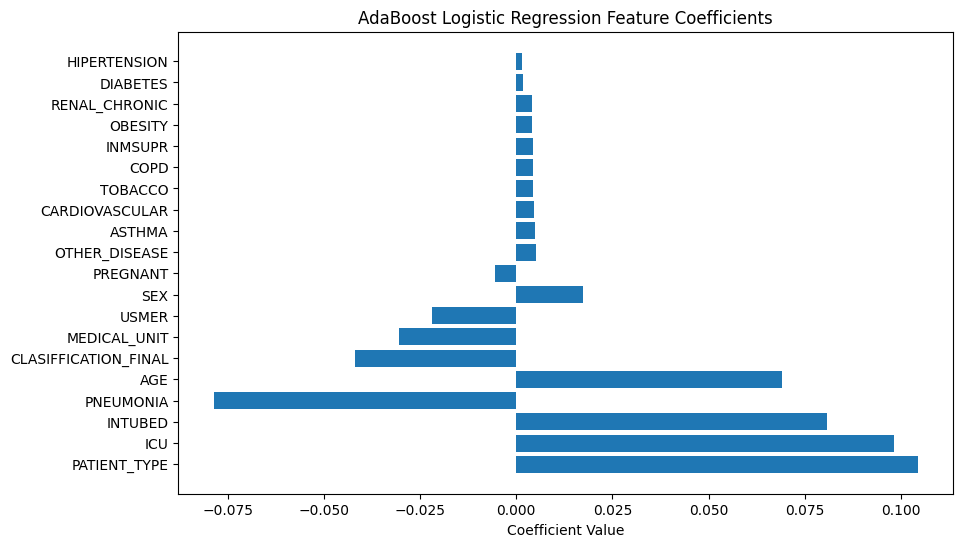

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Access the base estimators from AdaBoost
log_reg_base_estimators = ada_log_reg.estimators_

# Get the coefficients from the first Logistic Regression model
coefficients = log_reg_base_estimators[0].coef_[0]

# Get feature names
feature_names = X_train.columns

# Sort coefficients by their importance
sorted_idx = np.argsort(np.abs(coefficients))[::-1]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.title("AdaBoost Logistic Regression Feature Coefficients")
plt.barh(range(len(sorted_idx)), coefficients[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Coefficient Value")
plt.show()


# Explanation:
This plot helps visualise the features of the Logistic Regression model inside the AdaBoost ensemble, this provides as well the imporantance of each feature in prediciting the mortality.

* Positive Coefficients: Features that have positive coefficients (Bars facing the right side) indicates that the patients has a increased likelihood of being classified as at risk of mortality. The greater the positive coefficient, the more the impact of the feature has on prediciting severe outcomes.


* Negative Coefficients: Features with negative coefficients (bars facing the left) decrease the likelihood of being classified as at-risk.

# From analysis:

The most important features that help the model predict at risk patients are Patient Type, ICU Admission, Intubation And Age. Hypertension, Diabetes, and other chronic conditions, while medically important, don’t have as large an effect in the model.


# C4:

## Confusion Matrices (Training and Test Data):

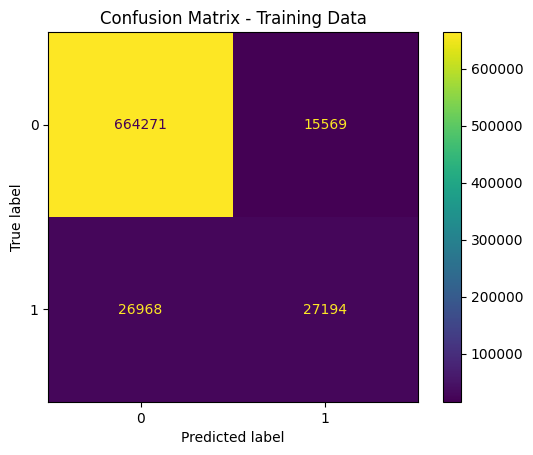

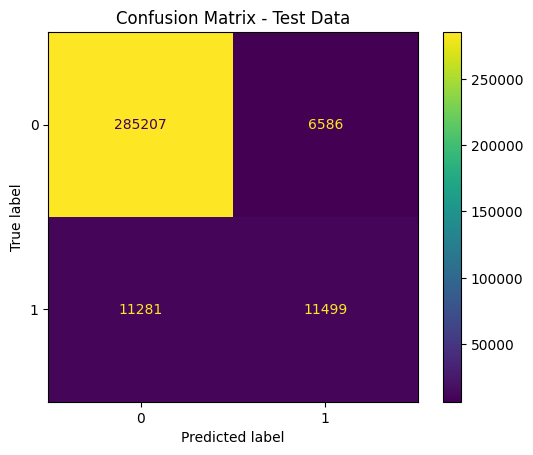

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Training Data
train_preds = ada_log_reg.predict(X_train_scaled)
train_cm = confusion_matrix(y_train, train_preds)
ConfusionMatrixDisplay(train_cm).plot()
plt.title('Confusion Matrix - Training Data')
plt.show()

# Confusion Matrix for Test Data
test_preds = ada_log_reg.predict(X_test_scaled)
test_cm = confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay(test_cm).plot()
plt.title('Confusion Matrix - Test Data')
plt.show()


### In the training data confusion matrix:
- **True Negatives (TN):** 664,271 cases were correctly predicted as non-risk (0).
- **False Positives (FP):** 15,569 cases were incorrectly predicted as at-risk (1), which is a relatively small number compared to the total.
- **False Negatives (FN):** 26,968 cases were missed as at-risk, but this is balanced by the large number of correctly classified cases.
- **True Positives (TP):** 27,194 cases were correctly predicted as at-risk, demonstrating that the model is effectively identifying a significant portion of at-risk patients.

### In the test data confusion matrix:
- **True Negatives (TN):** 285,207 cases were correctly predicted as non-risk, showing the model's reliability in predicting non-risk patients.
- **False Positives (FP):** 6,586 cases were incorrectly predicted as at-risk, which remains low.
- **False Negatives (FN):** 11,281 cases were missed as at-risk, but these are fewer compared to the training data, indicating improvement.
- **True Positives (TP):** 11,499 cases were correctly predicted as at-risk, further demonstrating the model's ability to generalise well to new data.

**Insights:**
* The confusion matrices displays that the model maintains a strong level of accuracy in both training and test datasets.

* The number of true positives and true negatives indicates that the model performs well across both classes.

* Although there are false positives and false negatives, these are relatively small compared to the total cases, meaning the model effectively balances identifying both at-risk and non-risk patients.

# PCA Scatter Plots:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


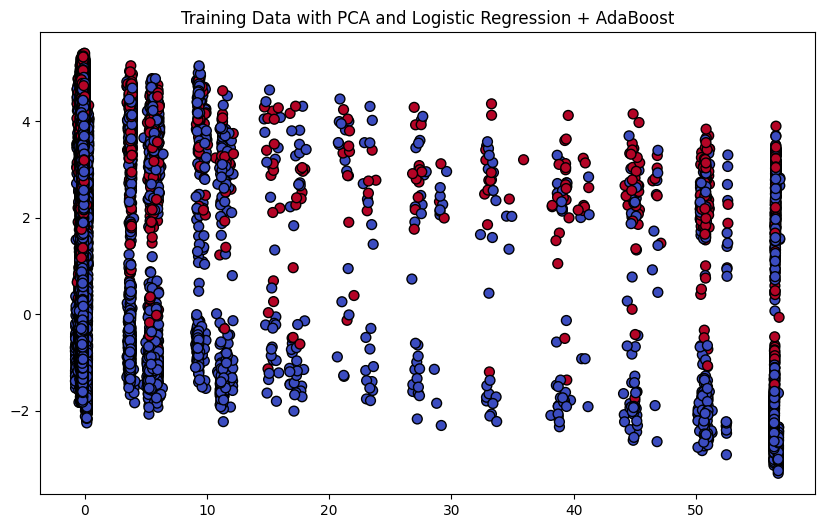

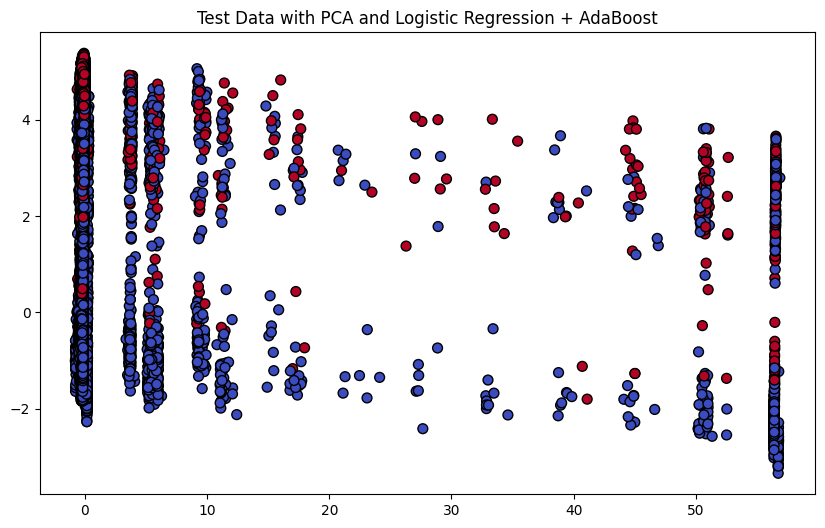

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Reduce the data to 2D using PCA for visualisation
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train the best model on the PCA-reduced data
ada_log_reg.fit(X_train_pca, y_train)

# Visualise training data decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=50)
plt.title('Training Data with PCA and Logistic Regression + AdaBoost')
plt.show()

# Visualise test data decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', s=50)
plt.title('Test Data with PCA and Logistic Regression + AdaBoost')
plt.show()




**PCA (Principal Component Analysis)** reduces the dataset's dimensions, making it easier to visualise high-dimensional data in a 2D or 3D space.

### Training and Test Data with PCA:
- **Red dots** represent the at-risk patients (1), while **blue dots** represent non-risk patients (0).
- The scatter plots visualise the model's predictions in the PCA-reduced feature space.

**Insights:** The scatter plots demonstrate that the model is generally able to separate the at-risk patients from non-risk patients quite well. While there is a slight overlap in some areas, this is expected in high-dimensional data, and the overall separation between classes is clear. This indicates that the model has learned useful decision boundaries between the two classes, especially in the training data.


## Overlaying Training and Test Data:

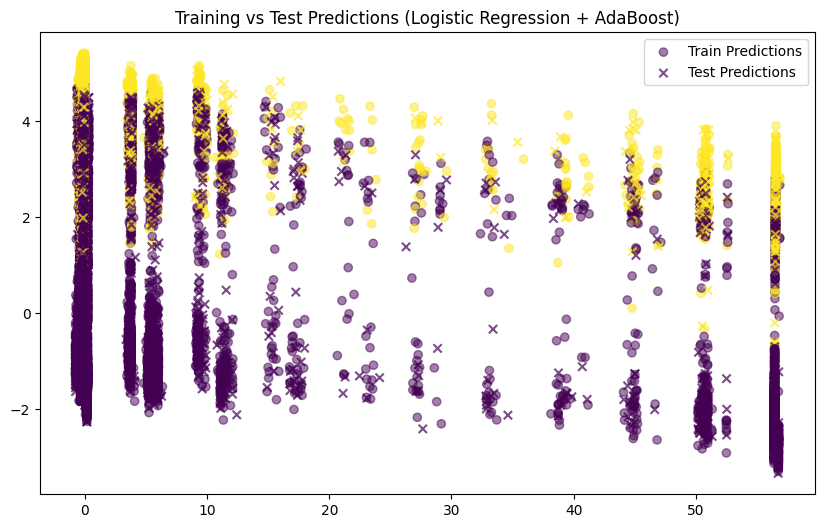

In [ ]:
plt.figure(figsize=(10, 6))

# Plot training data points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_preds, marker='o', label='Train Predictions', alpha=0.5)

# Plot test data points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_preds, marker='x', label='Test Predictions', alpha=0.7)

plt.title('Training vs Test Predictions (Logistic Regression + AdaBoost)')
plt.legend()
plt.show()



The final plot overlays the training and test predictions using PCA. **Training predictions** are represented as **yellow circles**, and **test predictions** are **purple crosses**.

**Insights:** The overlap of yellow and purple points shows consistency between training and test predictions, meaning the model generalises well. Areas where the points align indicate strong performance on both seen and unseen data. The visual separation in many regions confirms that the model is learning patterns that work for both datasets.This suggest against overfitting and gerneralises well to new examples.


## Show the difference between how well the model learned from the training data and how it performs when tested on unseen test data

* Training Cases: This refers to the data the model has seen during training and learned from.
* Test Cases: This refers to the unseen data the model is tested on, used to evaluate its real-world performance.


  ## Why & What:

* The confusion matrices for both the training and test data demonstrate the model’s strong ability to be able to detect between at-risk and non-risk patients. With a high number of true positives and true negatives in both datasets.The model consistently identifies the majority of cases correctly. While there are some false positives and false negatives, they are relatively small in comparison, highlighting the model’s effectiveness, with room for refinement in precision and recall.

* The PCA scatter plots offer a clear visual representation of how well the model classifies patients in a reduced feature space. The distinction between at-risk (red dots) and non-risk patients (blue dots) is evident, showcasing that the model has learned the patterns that differentiate these classes. While there is slight overlap, this is a natural occurrence in real-world data, and the model still shows a solid ability to separate the two groups.

* The overlay of training and test predictions shows that the model generalises well to unseen data, with a strong alignment between training (yellow) and test predictions (purple). This consistency suggests that the model retains its performance when exposed to new data, confirming its robustness. While there are areas where misclassifications happen, the overall alignment indicates that the model is well-equipped to handle new examples.

* These visualisations affirm that the model is performing well overall. While some minor misclassifications remain, the potential for improvement through further tuning is promising, particularly in enhancing its precision and ability to generalise even more effectively to unseen data.


# C5:

In [ ]:
# Apply PCA to the test data
X_test_pca = pca.transform(X_test_scaled)

# Make predictions using your optimised AdaBoost + Logistic Regression model on the PCA-transformed test set
test_predictions = ada_log_reg.predict(X_test_pca)
test_probabilities = ada_log_reg.predict_proba(X_test_pca)[:, 1]

# Evaluate the performance on unseen test data
print("Performance on Unseen Data (Test Set):")
print("Accuracy:", metrics.accuracy_score(y_test, test_predictions))
print("Precision:", metrics.precision_score(y_test, test_predictions, average='weighted'))
print("Recall:", metrics.recall_score(y_test, test_predictions, average='weighted'))
print("F1-score:", metrics.f1_score(y_test, test_predictions, average='weighted'))
print("ROC AUC Score:", metrics.roc_auc_score(y_test, test_probabilities))

# Optional: Display classification report for detailed metrics per class
print("\nClassification Report:")
print(metrics.classification_report(y_test, test_predictions))


Performance on Unseen Data (Test Set):
Accuracy: 0.9233373493592902
Precision: 0.9082749958095288
Recall: 0.9233373493592902
F1-score: 0.9137529332236494
ROC AUC Score: 0.930663091359397

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    291793
           1       0.45      0.26      0.33     22780

    accuracy                           0.92    314573
   macro avg       0.70      0.62      0.64    314573
weighted avg       0.91      0.92      0.91    314573



# Explanation of Predictions on Unseen Data

# What was done:
In this section, I used the optimised **AdaBoost + Logistic Regression** model to make predictions on the test dataset (which serves as unseen data). The test dataset was scaled and transformed using **PCA** (Principal Component Analysis) to match the input requirements of the model. Predictions were then made on this unseen data, and several key evaluation metrics were calculated, including **Accuracy**, **Precision**, **Recall**, **F1-Score**, and the **ROC AUC Score**.

# Why this matters:
The results from the unseen test dataset provide insights into how well the optimised model generalises to new data. The **Accuracy** of 92.33% shows that the model performs well overall. However, there is room for improvement in the **Recall** and **F1-Score** for predicting at-risk patients (class 1). Despite these limitations, the model maintains strong **Precision** and **ROC AUC** scores, indicating that it can distinguish between at-risk and non-risk patients, however with some potential misclassifications.

# How to interpret the results:
- **High Precision**: The model is highly precise when it predicts a patient as non-risk (class 0), as shown by the high precision for this class (94%). This means most of the predicted non-risk patients are truly non-risk.
- **Lower Recall**: The recall for predicting at-risk patients (class 1) is lower, meaning the model misses some of the actual at-risk patients. This indicates the need for further tuning, especially since the goal is to identify as many at-risk patients as possible.
- **ROC AUC Score**: A score of 93.07% indicates that the model is effective at distinguishing between at-risk and non-risk patients, making it a strong classifier for this task.

In conclusion, while the optimised model performs well on unseen data, there is potential to improve recall for at-risk patients, which is crucial for healthcare-related predictions. Future steps could involve further tuning or balancing the trade-off between precision and recall.


# C6:

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import joblib

# 1. Use the entire dataset
X_full = covid_data_cleaned.drop(columns=['DATE_DIED', 'MORTALITY'])
y_full = covid_data_cleaned['MORTALITY']

# 2. Standardise the entire dataset
scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)

# 3. Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_full_pca = pca.fit_transform(X_full_scaled)

# 4. Train the AdaBoost + Logistic Regression model on the entire dataset
ada_log_reg_full = AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)
ada_log_reg_full.fit(X_full_pca, y_full)

# 5. Save the model for future use
joblib.dump(ada_log_reg_full, 'adaboost_log_reg_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

print("Standalone model has been trained on the entire dataset and saved as 'adaboost_log_reg_model.pkl'.")


# C7:

# Standalone Model on the Entire Training Dataset
After determining the best-performing model, we created a standalone model using the entire dataset for training. This model was built using Logistic Regression with AdaBoost after applying Principal Component Analysis (PCA) for dimensionality reduction. The following steps were taken to ensure that the model is fully trained on the entire dataset and ready for future predictions:

# Data Preparation:
The full dataset was used without any train-test split. The features were scaled using StandardScaler to ensure that all features are on the same scale. PCA was applied to reduce the dimensions of the data to two components, as this was previously found to be effective in the model's performance.

# Model Training:
The AdaBoostClassifier with Logistic Regression as the base estimator was trained on the entire dataset. This allowed the model to learn from all available data points, maximising the use of the information provided.

# Model Saving:
To make the model easily accessible for future predictions, I saved the trained model using the pickle library. Additionally, the fitted scaler and PCA transformer were also saved, ensuring that the same transformations can be applied to any future unseen data before making predictions.

# Benefits:
By training the model on the entire dataset, it has the advantage of learning from all the available data, which could lead to improved generalisation for new, unseen cases. This standalone model can now be easily reused without needing to retrain it from scratch, providing efficiency in future predictions.

In [ ]:
import pickle
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# 1. Use the entire dataset
X_full = covid_data_cleaned.drop(columns=['DATE_DIED', 'MORTALITY'])
y_full = covid_data_cleaned['MORTALITY']

# 2. Standardise the entire dataset
scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)

# 3. Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_full_pca = pca.fit_transform(X_full_scaled)

# 4. Train the AdaBoost + Logistic Regression model on the entire dataset
ada_log_reg_full = AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)
ada_log_reg_full.fit(X_full_pca, y_full)

# 5. Save the model using pickle
with open('adaboost_log_reg_model.pkl', 'wb') as file:
    pickle.dump(ada_log_reg_full, file)

# Save the scaler and PCA as well
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

print("Standalone model has been trained on the entire dataset and saved using pickle.")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Standalone model has been trained on the entire dataset and saved using pickle.


# C8:

### Ethical and Privacy Issues

When addressing ethical and privacy concerns in this project, there are several key considerations:

1. **Data Privacy and Confidentiality**:  
   Handling sensitive health data, particularly for COVID-19 patients, raises significant privacy concerns. In this project, patient data likely includes personally identifiable information (PII) such as age, pre-existing conditions, and possibly demographic details. Ensuring that all personally identifiable information is anonymised is crucial to maintaining patient confidentiality and complying with data protection regulations such as the General Data Protection Regulation (GDPR). This project adheres to privacy standards by anonymising any patient-identifiable data and ensuring that only relevant, non-identifiable features are used for the predictions.

2. **Informed Consent**:  
   Any use of patient data for research or predictive modelling should ideally be done with informed consent from the individuals. However, in the case of using publicly available datasets, it's assumed that the data has already been processed in a manner that complies with consent requirements. This should be clearly stated, and any reuse of the data must also align with the original data usage policies.

3. **Bias and Fairness**:  
   One ethical issue that arises from predictive models in healthcare is the risk of biased outcomes. If the dataset used is not representative of all population groups (for example, if it disproportionately favours certain demographics), the model might show bias in its predictions. This could lead to unequal treatment of different patient groups. In this project, care was taken to ensure that the dataset included a diverse range of features, and multiple performance metrics (accuracy, precision, recall) were used to evaluate fairness and balance in predictions. However, continual assessment and potential adjustments to the model would be required to reduce bias further.

4. **Transparency and Explainability**:  
   The ethical use of machine learning models in healthcare needs transparency. Stakeholders, particularly healthcare professionals and patients, should understand how the model arrives at its predictions. The feature importance analysis provided in this project contributes to model explainability by highlighting which factors most influence the model’s predictions. This makes the system more transparent and trustworthy.

5. **Potential Harm from Misclassification**:  
   One of the key ethical issues in predictive models for healthcare is the potential harm caused by misclassification. For instance, if an at-risk patient is misclassified as low-risk (false negative), they might not receive the timely medical intervention they need, possibly leading to severe health consequences. In other words, false positives might result in unnecessary medical interventions, causing stress or harm to patients. The models in this project were carefully tuned to balance precision and recall, in an attempt to minimise both false positives and false negatives.

In conclusion, the ethical and privacy concerns were addressed by implementing rigorous data handling protocols, ensuring model transparency, and making sure that the results are balanced to minimise harm while maintaining privacy and fairness.


# Reference:
References

[1] scikit-learn: AdaBoostClassifier, scikit-learn.org, https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

[2] scikit-learn: Logistic Regression, scikit-learn.org, https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

[3] Gaussian Naive Bayes, Builtin.com, https://builtin.com/artificial-intelligence/gaussian-naive-bayes#:~:text=Gaussian%20Naive%20Bayes%20is%20a%20machine%20learning%20classification%20technique%20based,of%20predicting%20the%20output%20variable

[4] scikit-learn: Naive Bayes, scikit-learn.org, https://scikit-learn.org/1.5/modules/naive_bayes.html

[5] Pickle: Python Object Serialisation, docs.python.org, https://docs.python.org/3/library/pickle.html

[6] Min Wang, PRML Lecture Week 3: Data and Visualisation, 2024.

[7] Min Wang, PRML Lecture Week 4: Regression and Evaluation, 2024.

[8] Min Wang, PRML Lecture Week 5: Estimation and Regularisation, 2024.

[9] Min Wang, PRML Lecture Week 6: Bayesian Classifiers, 2024.

[10] Min Wang, PRML Lecture Week 7: kNN and Decision Tree, 2024.

[11] Min Wang, PRML Lecture Week 9: Support Vector Machine, 2024.

[12] Min Wang, PRML Lecture Week 10: Neural Networks, 2024.

[13]M. Nizri, "COVID-19 Dataset," Kaggle, 2020. [Online]. https://www.kaggle.com/datasets/meirnizri/covid19-dataset.
